### Desafío Expansiones basales
- Para realizar este desafío debes haber estudiado previamente todo el material
disponibilizado correspondiente a la unidad.

- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los
requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo desafío:
  - El desafío se debe desarrollar de manera Individual.
  - Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío Expansiones basales.

### Descripción
- Una aplicación interesante de los modelos predictivos es poder predecir propiedades
de materiales compuestos a partir de diferentes combinaciones en el proceso y
creación de estos.
- Para este desafío trabajaremos con un dataset que contiene diferentes medidas de
materiales con los que se hace la mezcla de concreto.
- Nuestra tarea será utilizar estas medidas para predecir la capacidad de resistir
fuerzas compresivas de vigas de concreto, a esta capacidad de soportar fuerzas que
buscan reducir la superficie o volumen de un cuerpo se le conoce como fuerza
compresiva.

### Ejercicio 1: Preparar el ambiente de trabajo
- Importe los módulos clásicos del trabajo en ciencia de datos.
- El archivo tiene el nombre `compresive_strength_concrete.csv`. Importe y genere
estadísticas descriptivas.
- En esta actividad su tarea será predecir la fuerza compresiva del concreto a partir de
las medidas en la mezcla, para esto, utilice un modelo aditivo generalizado de la
librería pyGAM.



In [10]:
# Triada calsica
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Graficos seaborn, warnings y datos perdidos
import seaborn as sns
import missingno as msngo
import warnings

# Analicis exploratorio y descriptivo
from pandas_profiling import ProfileReport

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from pygam import LinearGAM, s

# Modulo de funciones especiales y graficos
import func as gfx

# Otras librerias, configuraciones e instancias
labelencoder = LabelEncoder()
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('seaborn-darkgrid')

In [3]:
df = pd.read_csv('Datasets/compresive_strength_concrete.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.00,0.00,0.00,162.00,2.50,1040.00,676.00,28,79.99
1,540.00,0.00,0.00,162.00,2.50,1055.00,676.00,28,61.89
2,332.50,142.50,0.00,228.00,0.00,932.00,594.00,270,40.27
3,332.50,142.50,0.00,228.00,0.00,932.00,594.00,365,41.05
4,198.60,132.40,0.00,192.00,0.00,978.40,825.50,360,44.30


### Ejercicio 2: Descripción
- El vector objetivo tiene el nombre de `Concrete compressive strength(MPa,
megapascals)`
- Los nombres de las variables son muy poco amigables, dado que contienen
espacios, paréntesis y otros elementos difíciles de referenciar. Se sugiere (pero no se
obliga) renombrar las variables o acceder a éstas mediante notación de índice iloc.
- Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y
distribución. Decide si es necesario normalizarlos/escalarlos.

In [4]:
# Limpieza de cararcteres en nombre de las variables
df.columns = df.columns.map(lambda x: str(x).lower().replace(' ', '_'))
df.columns = df.columns.map(lambda x: str(x).lower().replace('(', ''))
df.columns = df.columns.map(lambda x: str(x).lower().replace(')', ''))
df.head()

,cement_component_1kg_in_a_m^3_mixture,blast_furnace_slag_component_2kg_in_a_m^3_mixture,fly_ash_component_3kg_in_a_m^3_mixture,water__component_4kg_in_a_m^3_mixture,superplasticizer_component_5kg_in_a_m^3_mixture,coarse_aggregate__component_6kg_in_a_m^3_mixture,fine_aggregate_component_7kg_in_a_m^3_mixture,age_day,"concrete_compressive_strengthmpa,_megapascals_"
0,540.00,0.00,0.00,162.00,2.50,1040.00,676.00,28,79.99
1,540.00,0.00,0.00,162.00,2.50,1055.00,676.00,28,61.89
2,332.50,142.50,0.00,228.00,0.00,932.00,594.00,270,40.27
3,332.50,142.50,0.00,228.00,0.00,932.00,594.00,365,41.05
4,198.60,132.40,0.00,192.00,0.00,978.40,825.50,360,44.30


In [5]:
# Cambio de nombres a variables
df = df.rename(columns={'cement_component_1kg_in_a_m^3_mixture':'cement',
                        'blast_furnace_slag_component_2kg_in_a_m^3_mixture':'blast_furnace',
                        'fly_ash_component_3kg_in_a_m^3_mixture':'fly_ash',
                        'water__component_4kg_in_a_m^3_mixture':'water',
                        'superplasticizer_component_5kg_in_a_m^3_mixture':'superplasticizer',
                        'coarse_aggregate__component_6kg_in_a_m^3_mixture':'coarse_aggregate',
                        'fine_aggregate_component_7kg_in_a_m^3_mixture':'fine_aggregate',
                        'age_day':'age',
                        'concrete_compressive_strengthmpa,_megapascals_':'concrete'})

df.head()

,cement,blast_furnace,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete
0,540.00,0.00,0.00,162.00,2.50,1040.00,676.00,28,79.99
1,540.00,0.00,0.00,162.00,2.50,1055.00,676.00,28,61.89
2,332.50,142.50,0.00,228.00,0.00,932.00,594.00,270,40.27
3,332.50,142.50,0.00,228.00,0.00,932.00,594.00,365,41.05
4,198.60,132.40,0.00,192.00,0.00,978.40,825.50,360,44.30


In [6]:
# Inspeccion de el tipo de datos
df.dtypes

cement              float64
blast_furnace       float64
fly_ash             float64
water               float64
superplasticizer    float64
coarse_aggregate    float64
fine_aggregate      float64
age                   int64
concrete            float64
dtype: object

In [7]:
print(f'''La base de datos se compone de las siguientes observaciones
Numero de filas: {df.shape[0]}
Numero de columnas: {df.shape[1]}''')

La base de datos se compone de las siguientes observaciones
Numero de filas: 1030
Numero de columnas: 9


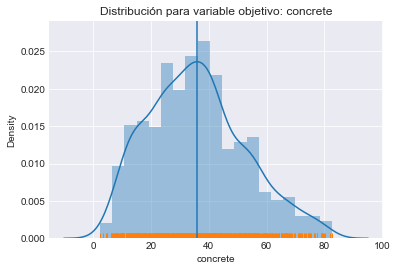

In [8]:
# Visualizacion distribucion vector objetivo
sns.distplot(x = df['concrete'])
sns.rugplot(x = df['concrete'])
plt.title(f'Distribución para variable objetivo: concrete')
plt.axvline(df['concrete'].mean())
plt.show()

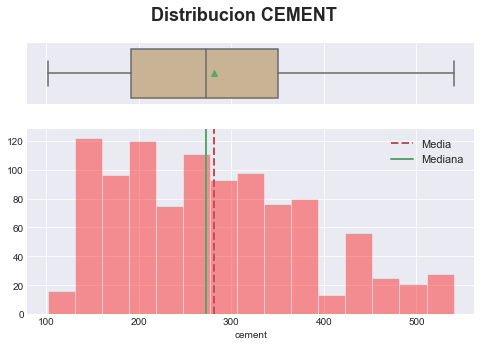

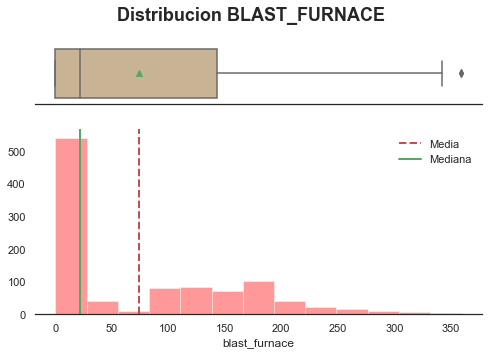

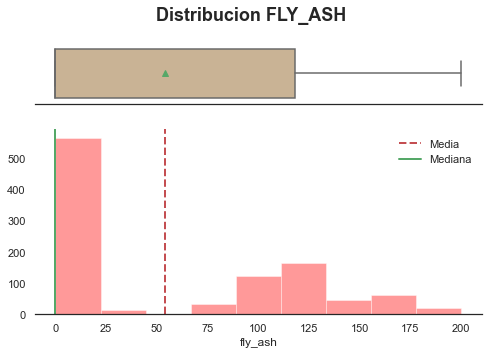

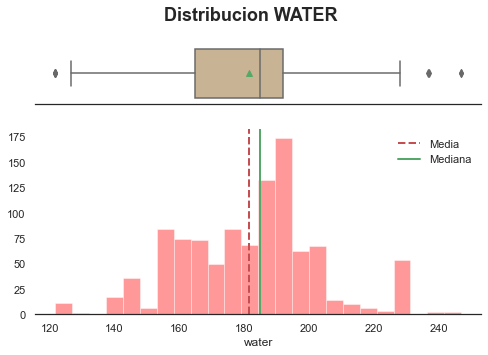

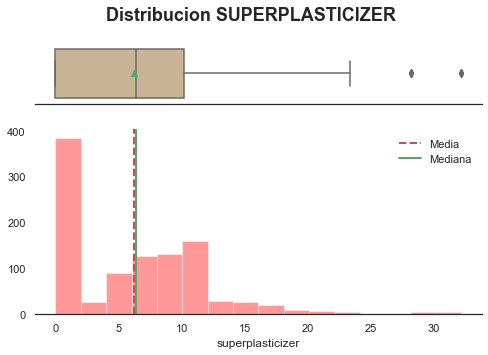

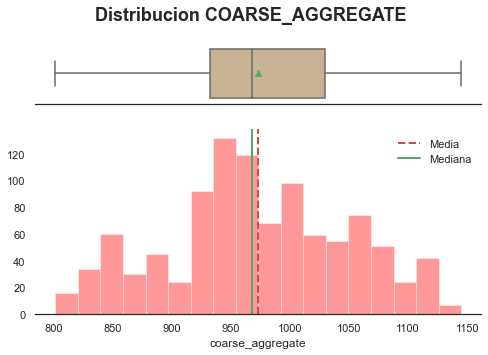

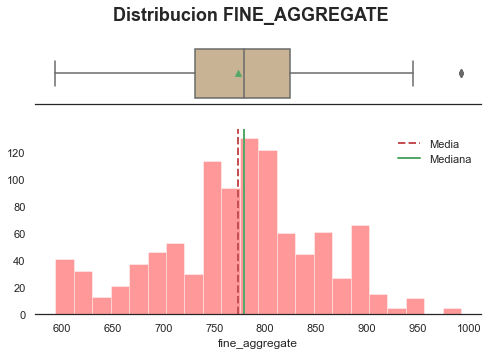

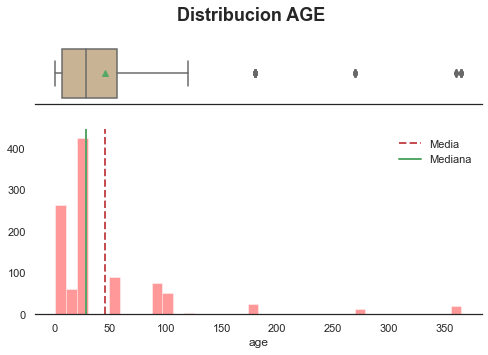

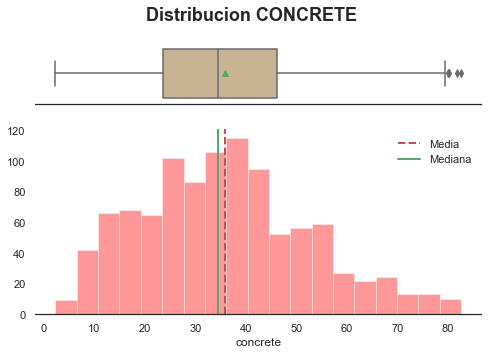

In [12]:
name_vars = ['cement', 'blast_furnace', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age', 'concrete']

for i in range(len(name_vars)):
        gfx.dist_box(df[name_vars[i]])

### Ejercicio 3: Modelo
- En base al vector objetivo, decida el mejor modelo e importe con pygam. Condicional
a esto, importe las métricas de desempeño asociadas.

- Genere conjuntos de entrenamiento y validación.
- Genere un primer modelo sin implementar la función gridsearch. Reporte el hiper
parámetro lam así como las métricas de desempeño asociadas.
- Genere un segundo modelo implementando gridsearch en lambda con un
logspace entre -3 y 3. Comente sobre el mejor hiper parámetro y sus métricas de
desempeño.

In [13]:
gfx.summary_drop(df)

,tipo,nulos,nulos_porces,ceros,ceros_porces,count,mean,std,min,25%,50%,75%,max,dist_IQR,limit_inf,limit_sup,outliers
age,int64,0,0.00,0,0.00,1030.00,45.66,63.17,1.00,7.00,28.00,56.00,365.00,49.00,-66.50,129.50,59
cement,float64,0,0.00,0,0.00,1030.00,281.17,104.51,102.00,192.38,272.90,350.00,540.00,157.62,-44.06,586.44,0
blast_furnace,float64,0,0.00,471,0.46,1030.00,73.90,86.28,0.00,0.00,22.00,142.95,359.40,142.95,-214.42,357.38,2
fly_ash,float64,0,0.00,566,0.55,1030.00,54.19,64.00,0.00,0.00,0.00,118.30,200.10,118.30,-177.45,295.75,0
water,float64,0,0.00,0,0.00,1030.00,181.57,21.35,121.80,164.90,185.00,192.00,247.00,27.10,124.25,232.65,9
superplasticizer,float64,0,0.00,379,0.37,1030.00,6.20,5.97,0.00,0.00,6.40,10.20,32.20,10.20,-15.30,25.50,10
coarse_aggregate,float64,0,0.00,0,0.00,1030.00,972.92,77.75,801.00,932.00,968.00,1029.40,1145.00,97.40,785.90,1175.50,0
fine_aggregate,float64,0,0.00,0,0.00,1030.00,773.58,80.18,594.00,730.95,779.50,824.00,992.60,93.05,591.38,963.57,5
concrete,float64,0,0.00,0,0.00,1030.00,35.82,16.71,2.33,23.71,34.45,46.14,82.60,22.43,-9.93,79.77,4


In [14]:
sub = df[['cement', 'blast_furnace', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age']]

In [15]:
# Dividimos en conjunto de entrenamiento y validacion respecto al vector objetivo
X_train_pre, X_test_pre, y_train, y_test = train_test_split(sub, df['concrete'], test_size = .33, random_state = 15820)

# Ajustamos el estandarizador al conjunto de entrrenamiento
scaler = StandardScaler().fit(X_train_pre)

In [16]:
# Con el estandarizador ajustado sobre el conjunto de entrenamiento, transformamos el conjunto de entrenamiento
X_train = pd.DataFrame(scaler.transform(X_train_pre), columns = X_train_pre.columns)
X_test = pd.DataFrame(scaler.transform(X_test_pre), columns = X_test_pre.columns)

In [17]:
lams = np.logspace(-3, 3, 3)
lams

array([1.e-03, 1.e+00, 1.e+03])

In [18]:
lams = [lams]*len(X_train.columns)
lams

[array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03])]

In [19]:
# Genere un primer modelo sin implementar la función gridsearch.
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7), fit_intercept=True)

In [20]:
gam.fit(X_train, y_train)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + intercept,
   tol=0.0001, verbose=False)

In [21]:
# Reporte el hipeparámetro lam así como las métricas de desempeño asociadas.
print(f'Metricas para el primer modelo entrenado sin gridsearch con lambda: {gam.lam}\n')
gfx.report_metrics(gam, X_test, y_test)

Metricas para el primer modelo entrenado sin gridsearch con lambda: [[0.6], [0.6], [0.6], [0.6], [0.6], [0.6], [0.6], [0.6]]


    Test R2: 0.8869344938192145
    Test MSE: 31.899317281027905
    Test Median Absolute Error: 3.4820611211320047


In [22]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     79.5875
Link Function:                     IdentityLink Log Likelihood:                                 -2885.1189
Number of Samples:                          690 AIC:                                             5931.4127
                                                AICc:                                            5953.0261
                                                GCV:                                               32.2927
                                                Scale:                                             25.6658
                                                Pseudo R-Squared:                                    0.918
Feature Function                  Lam

In [23]:
# Genere un segundo modelo implementando la función gridsearch.
gam_2 = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7), fit_intercept=True)

In [24]:
gam_2.gridsearch(X_train.values, y_train.values, lam = lams)

100% (6561 of 6561) |####################| Elapsed Time: 0:14:06 Time:  0:14:06


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + intercept,
   tol=0.0001, verbose=False)

In [25]:
# Reporte el hipeparámetro lam así como las métricas de desempeño asociadas.
print(f'Metricas para el segundo modelo entrenado implementando gridsearch con lambda: {gam_2.lam}\n')
gfx.report_metrics(gam_2, X_test, y_test)

Metricas para el segundo modelo entrenado implementando gridsearch con lambda: [[1.0], [1.0], [0.001], [1.0], [0.001], [1.0], [0.001], [0.001]]


    Test R2: 0.8927132517177642
    Test MSE: 30.268948851939236
    Test Median Absolute Error: 3.2616781558476973


In [26]:
gam_2.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     96.1481
Link Function:                     IdentityLink Log Likelihood:                                 -2822.2422
Number of Samples:                          690 AIC:                                             5838.7808
                                                AICc:                                            5871.0014
                                                GCV:                                               31.0889
                                                Scale:                                             23.4034
                                                Pseudo R-Squared:                                   0.9272
Feature Function                  Lam

In [27]:
def partial_dependence(model):
        """Funcion que imprime grafico de las dependencias parciales de las variables del modelo.
        Args:
                model: modelo entrenado
        Returns:
                subplots: con todas las variables del modelo
        """
        fig, axs = plt.subplots(2,4, figsize =(20,6))

        titles = X_train.columns

        for i, ax in enumerate (axs.flatten()):
                XX = model.generate_X_grid(term=i)
                ax.plot(XX[:, i], model.partial_dependence(term = i, X = XX))
                ax.plot(XX[:, i], model.partial_dependence(term = i, X = XX, width = .95)[1], c = 'r', ls = '--')
                ax.scatter(X_train[titles[i]], [0] * len(X_train[titles[i]]), marker = '|', alpha = .5)
                ax.set_title(titles[i])


    Test R2: 0.8869344938192145
    Test MSE: 31.899317281027905
    Test Median Absolute Error: 3.4820611211320047


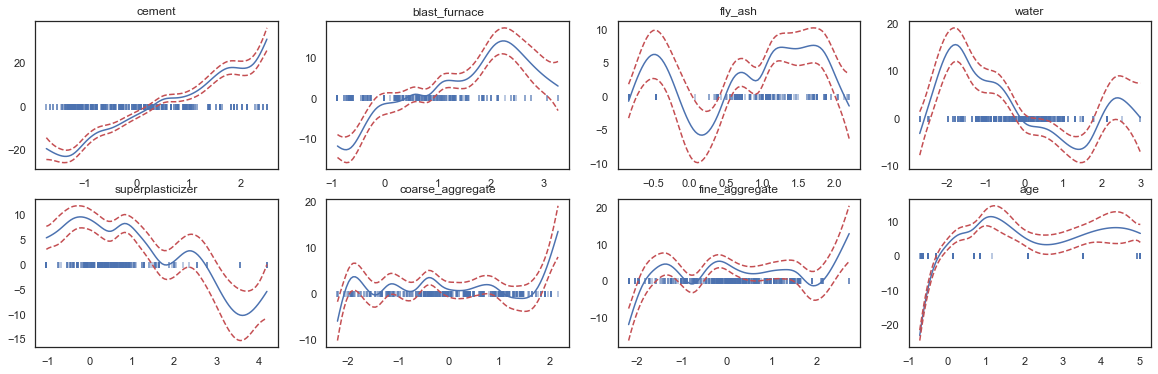

In [28]:
partial_dependence(gam)
gfx.report_metrics(gam, X_test, y_test)


    Test R2: 0.8927132517177642
    Test MSE: 30.268948851939236
    Test Median Absolute Error: 3.2616781558476973


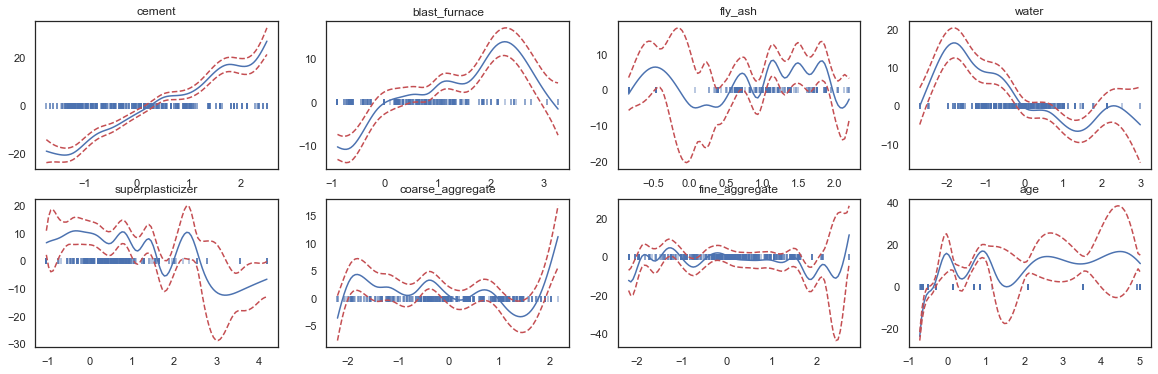

In [29]:
partial_dependence(gam_2)
gfx.report_metrics(gam_2, X_test, y_test)

Realizamos el analisis sobre el primer modelo (Gam sin gridsearch). Podemos notar que la variable 'cement', 'coarse_aggregate' y 'fine_aggregate' agregan niveles de resistencia mientras que 'water', 'blast_fumance', 'superplastizer' y 'fly_ash' estas tienden a niveles bajos de resistencia. La variable 'age' presenta mucha inestabilidad y no explica el comportamiento del vector objetivo 'concret' respecto a su resistencia.